# Sales Performance Analysis 

# Target 2

In [1]:
#First import required libraries and uploaded the dataset.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file into a DataFrame
final_data = pd.read_csv('new_dataset_without_outliers.csv')
final_data

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
2,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.37
3,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86
4,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.80
8644,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.37
8645,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.19
8646,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.38


# Task 1: Simple Facts¶
### Average Sales:

In [3]:
# Calculate average sales
average_sales = final_data['Sales'].mean()
print(f"Average Sales: ${average_sales:.2f}")

Average Sales: $93.18


### Most Sold Product:

In [4]:
# Find the most sold product
most_sold_product = final_data.loc[final_data['Sales'].idxmax()]['Product_Name']
print(f"Most Sold Product: {most_sold_product}")


Most Sold Product: Samsung Galaxy S4 Active


### Least Sold Product:

In [5]:
# Find the least sold product
least_sold_product = final_data.loc[final_data['Sales'].idxmin()]['Product_Name']
print(f"Least Sold Product: {least_sold_product}")

Least Sold Product: Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum


## Task 2: Pictures Help

### Sales Over Time (Line Chart):

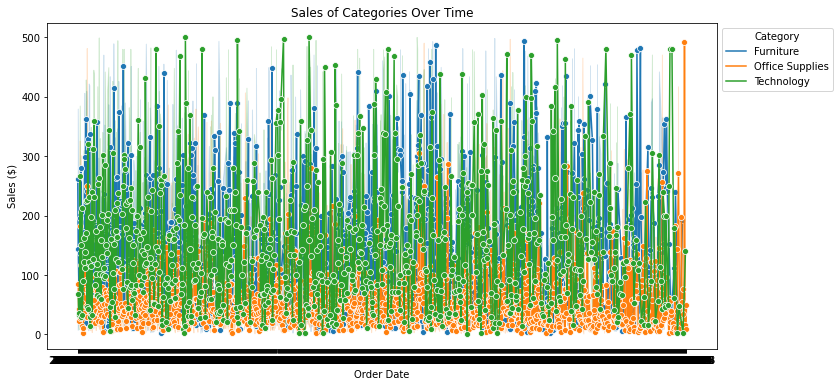

In [6]:
###Sales Over Time (Line Chart):

# Assuming 'Category' is a column in your DataFrame
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order_Date', y='Sales', hue='Category', data=final_data, marker='o')
plt.title('Sales of Categories Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales ($)')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

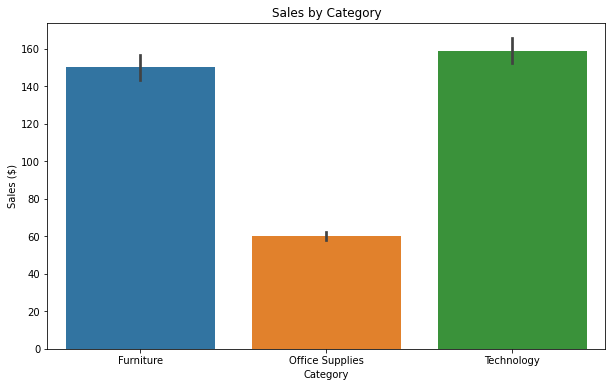

In [7]:
# Create a bar chart to visualize sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=final_data)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales ($)')
plt.show()

## Task 3: Patterns in Time

### Trend in Total Sales ( Daily and weekly)

In [8]:
# Convert 'Order_Date' to datetime format
final_data['Order_Date'] = pd.to_datetime(final_data['Order_Date'], errors='coerce')

# Extract month from the 'Order_Date' column
#final_data['Month'] = final_data['Order_Date'].dt.month



<AxesSubplot:title={'center':'Daily Sales'}, xlabel='Order_Date', ylabel='Sales'>

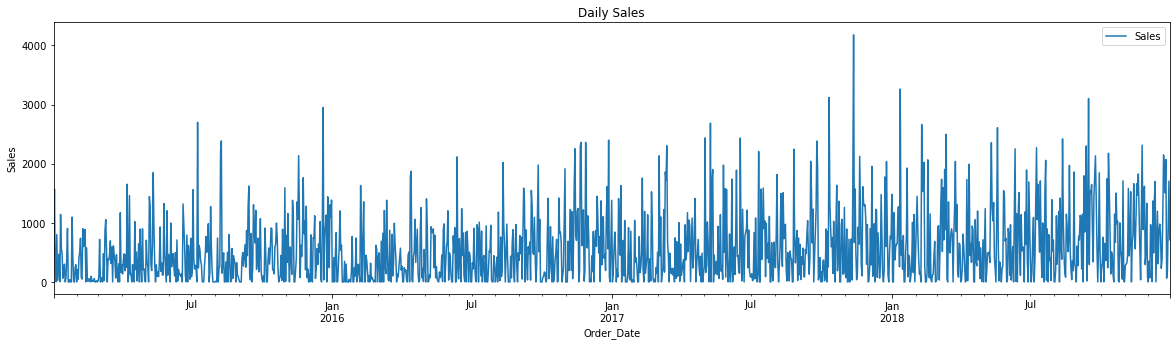

In [9]:
# There are some duplicate values in the Order_Date feature so resampling is done
total = final_data[['Order_Date', 'Sales']].set_index('Order_Date')
total.resample(rule='D').sum().plot(title='Daily Sales', figsize=(20, 5), ylabel='Sales')

<AxesSubplot:title={'center':'Weekly Sales'}, xlabel='Order_Date', ylabel='Sales'>

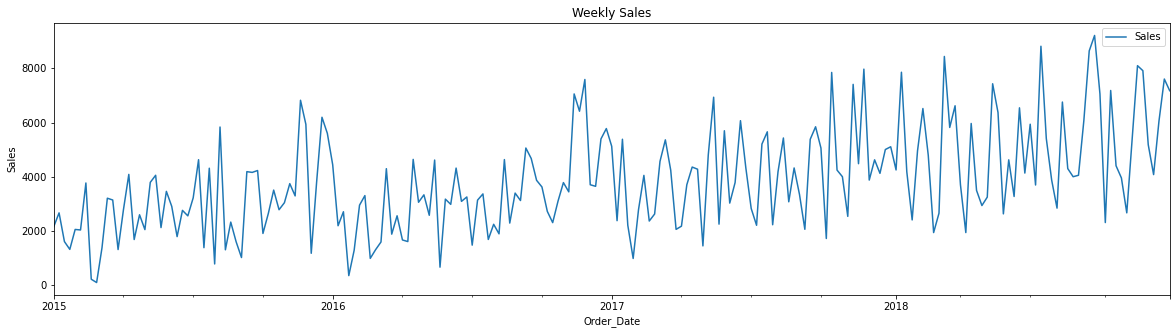

In [10]:
total.resample(rule='W').sum().plot(title='Weekly Sales', figsize=(20, 5), ylabel='Sales')

<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='Order_Date', ylabel='Sales'>

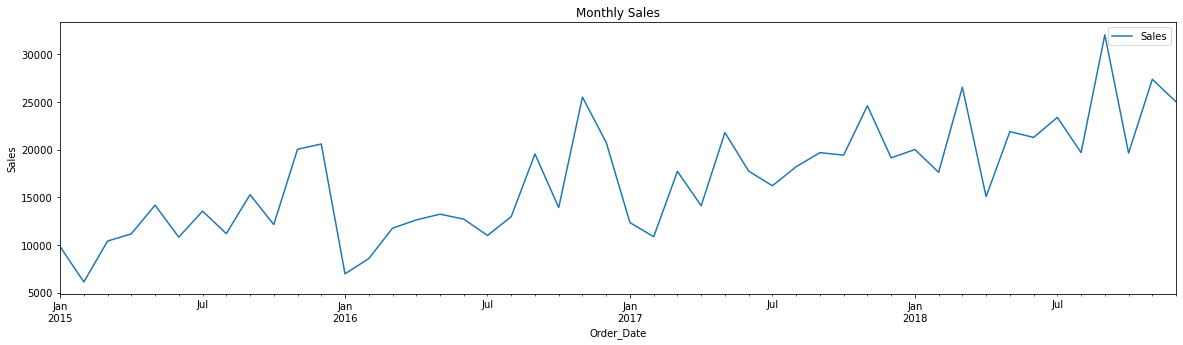

In [11]:
total.resample(rule='M').sum().plot(title='Monthly Sales', figsize=(20, 5), ylabel='Sales')

The data is from 2015 to 2018. The daily data doesn't look quite clear. There are some peaks near New Year but doesn't seems to have trend or seasonality. Weeky data seems to have a little bit of upward trend and doesn't seems to be seasonal. The monthly data seems to have peaks at the oct to december. Statistical Tests will be needed to determine the seasonality and trend.

### Daily Trend for each Year

In [12]:
daily_total = total.resample(rule='D').sum()
daily_total['Year'] = daily_total.index.to_period('Y')

<AxesSubplot:title={'center':'Daily Sales 2018'}, xlabel='Order_Date', ylabel='Sales'>

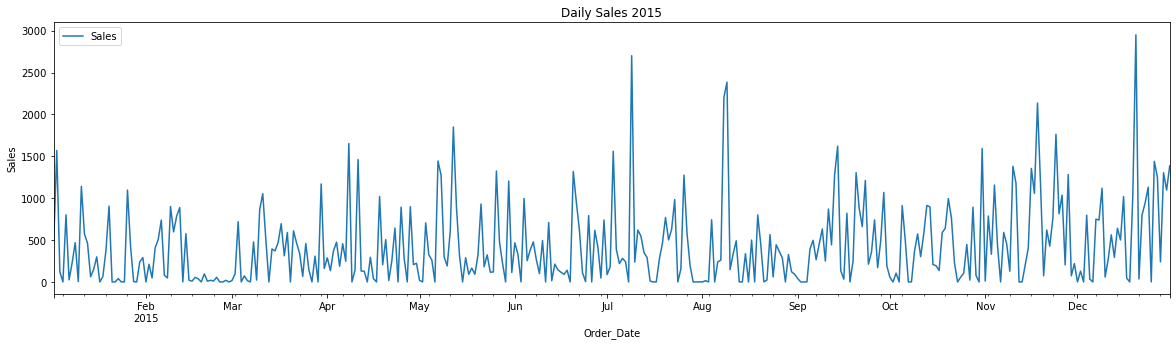

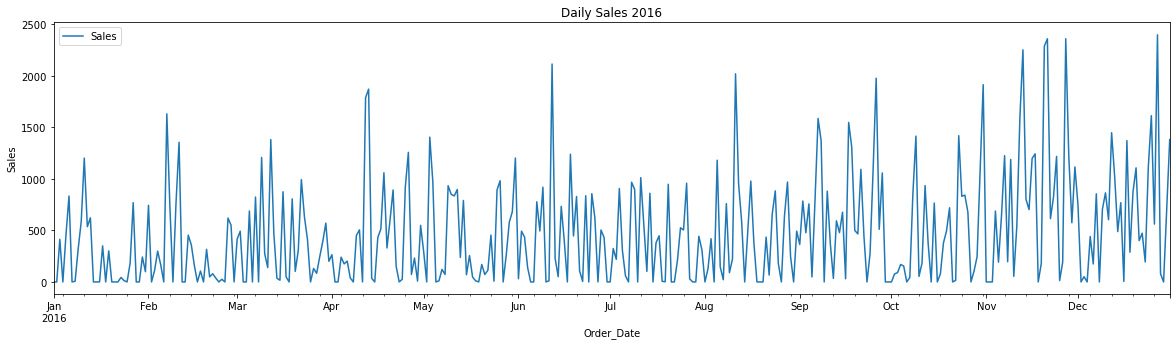

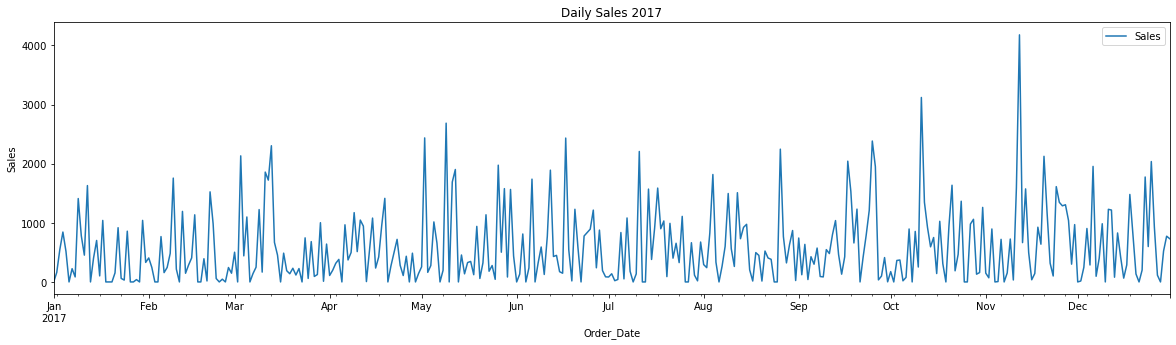

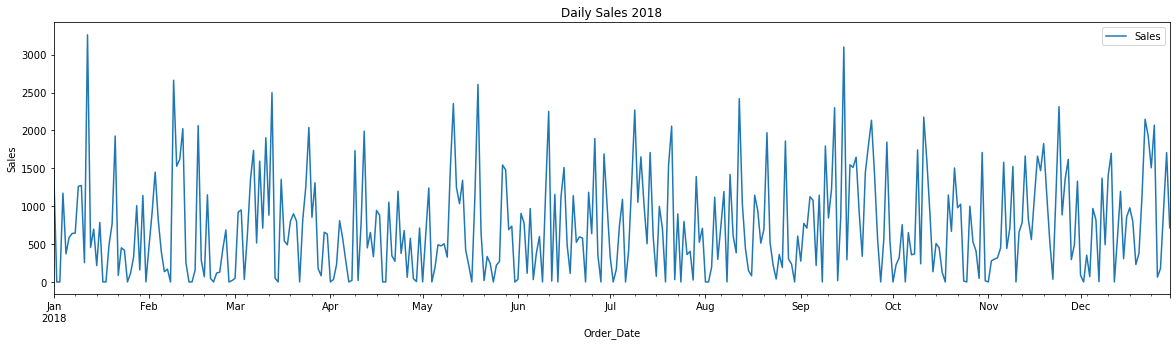

In [13]:
total_2015 = daily_total[daily_total.index < '2016']
total_2016 = daily_total[(daily_total.index >= '2016') & (daily_total.index < '2017')]
total_2017 = daily_total[(daily_total.index >= '2017') & (daily_total.index < '2018')]
total_2018 = daily_total[(daily_total.index >= '2018') & (daily_total.index < '2019')]

total_2015.plot(title='Daily Sales 2015', figsize=(20, 5), ylabel='Sales')
total_2016.plot(title='Daily Sales 2016', figsize=(20, 5), ylabel='Sales')
total_2017.plot(title='Daily Sales 2017', figsize=(20, 5), ylabel='Sales')
total_2018.plot(title='Daily Sales 2018', figsize=(20, 5), ylabel='Sales')

### Total Sales in each year

Text(0.5, 1.0, 'Total Sales in each Year')

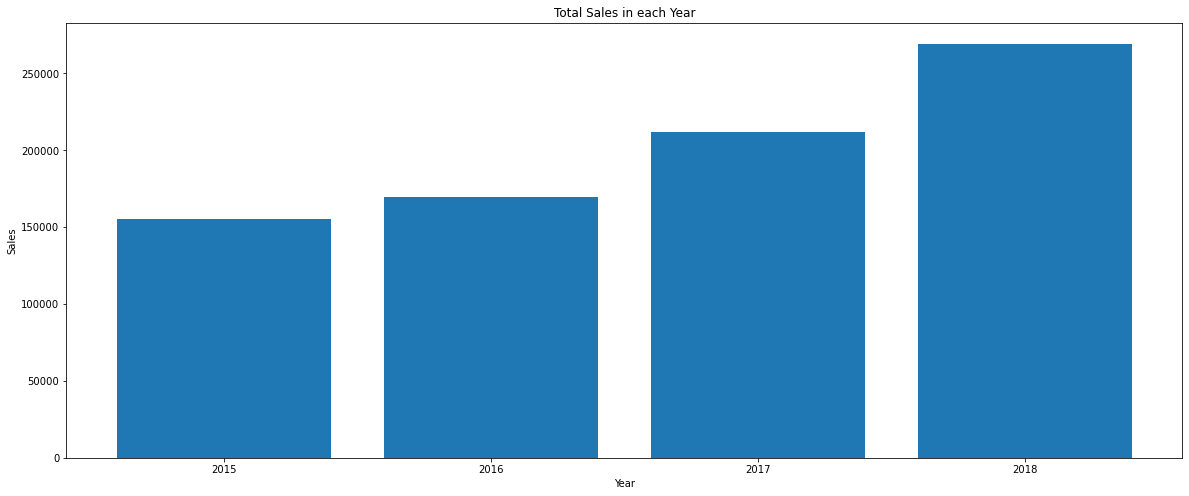

In [14]:
yearly_sales = daily_total.groupby('Year').sum().sort_values('Sales', ascending=True)
plt.figure(figsize=(20, 8))
plt.bar(x=yearly_sales.index.astype('str'), height=yearly_sales.Sales)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales in each Year')